<a href="https://colab.research.google.com/github/usman-babar/BigMart-Product-Outlet-Sales-Analysis-and-Prediction-Project/blob/main/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mini Project**

# **Problem Statement**

The problem is to build a predictive model to determine the sales of each product at different stores.

# **Hypothesis Generation**

Generate hypotheses about the factors that might influence sales based on prior knowledge and understanding of the data. For example, the location of the store, product attributes, promotions, and store size could be potential factors.

In [ ]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# **Preprocessing and Data Analysis 💻**

# **Loading Packages and Data**

**Train Data**

In [ ]:
# Load the data into a DataFrame Train Data
data_url = 'https://drive.google.com/file/d/1qHTYFy5lLTfzSH2x6j8OZYsKvWWrDqXp/view?usp=drive_link'
file_id = data_url.split('/')[-2]
train_ds = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(train_ds)

df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Test Data**

In [ ]:
data_url_test = 'https://drive.google.com/file/d/1sc830BUJzgk-NXT3-LbG_ntDdCo64OIw/view?usp=drive_link'
file_id_test = data_url_test.split('/')[-2]
test_ds = f'https://drive.google.com/uc?id={file_id_test}'
df_test = pd.read_csv(test_ds)

In [ ]:
print(f"training set (row, col): {df.shape}\n\ntesting set (row, col): {df_test.shape}")

training set (row, col): (8523, 12)

testing set (row, col): (5681, 11)


In [ ]:
#column information
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#summary statistics test
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#summary statistics test
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## **Missing values** 🚫

In [ ]:
#missing values in decsending order
print("Train:\n")
print(df.isnull().sum().sort_values(ascending=False),"\n\n",df.isnull().sum()/df.shape[0] *100,"\n\n")
print("Test:\n")
print(df_test.isnull().sum().sort_values(ascending=False),"\n\n",df_test.isnull().sum()/df_test.shape[0] *100,"\n\n")

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

### Let's check the value counts for `Outlet_Size` and `Item_Weight`:

In [ ]:
print("test mode, train mode\n",[df['Outlet_Size'].mode().values[0], df_test['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


In [ ]:
#train
df['Outlet_Size'] = df['Outlet_Size'].fillna(
df['Outlet_Size'].dropna().mode().values[0])

#test
df_test['Outlet_Size'] = df_test['Outlet_Size'].fillna(
df_test['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
df_test['Outlet_Size'].isnull().sum(),df_test['Outlet_Size'].isnull().sum()

(0, 0)

Text(0.5, 1.0, 'Item_Weight Boxplot')

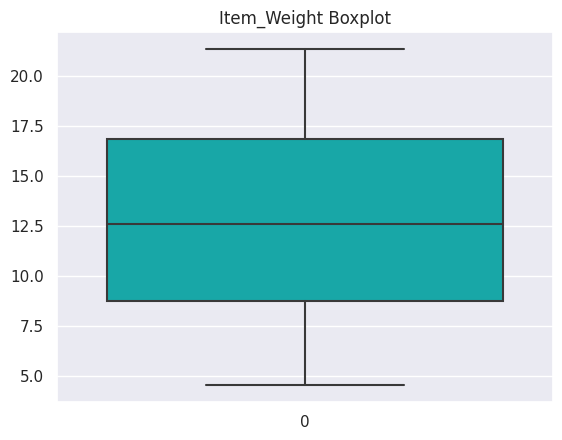

In [ ]:
# I personally prefer a vertical view and a cyan color
sns.boxplot(data=df['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")

In [ ]:
#train
df['Item_Weight'] = df['Item_Weight'].fillna(
df['Item_Weight'].dropna().mean())

#test
df_test['Item_Weight'] = df_test['Item_Weight'].fillna(
df_test['Item_Weight'].dropna().mean())

#checking if we filled missing values
df['Item_Weight'].isnull().sum(),df_test['Item_Weight'].isnull().sum()

(0, 0)

**Now we can see using the .info() method we can see we have filled succesfully all mising the missing data for both sets:**

In [ ]:
print("train:\n")
print(df.info())
print("\n\ntest:\n")
print(df_test.info())

train:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


test:

<class 'pandas.core.fra

# **Data Exploration**

In [ ]:
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = df.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  df[num]
#categoric df
BM_cat = df[cat]

#print(num)
#print(cat)

[df[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

We can See we have Repeating values with different names in the Item_Fat_Content column, we will correct them using the using the .replace() method

In [ ]:
#train
df['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)
#test
df_test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                 ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
df.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Let's take a look again at our data:

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Years
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808,Food,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776,Drinks,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868,Food,14
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,6.597664,Food,15
4,NCD19,8.93,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451,Non-Consumable,26


`Outlet_Establishment_Year` is quite useless as it is, making a new column with the age the new name will be `Outlet_Age`

In [ ]:
#creating our new column for both datasets
df['Outlet_Age'], df_test['Outlet_Age']= df['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), df_test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)


## Data Visualization 

### Univariate Plots
For starters we will create countplots for the categorical columns:

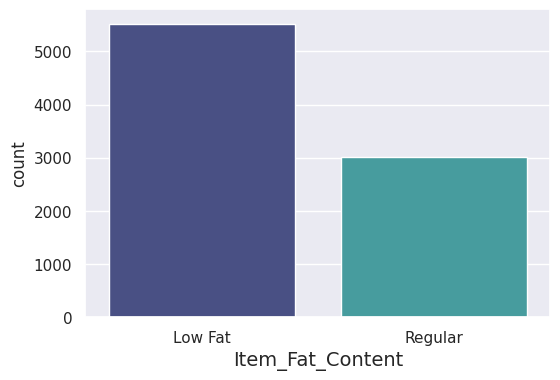

In [ ]:
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
 
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=df ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

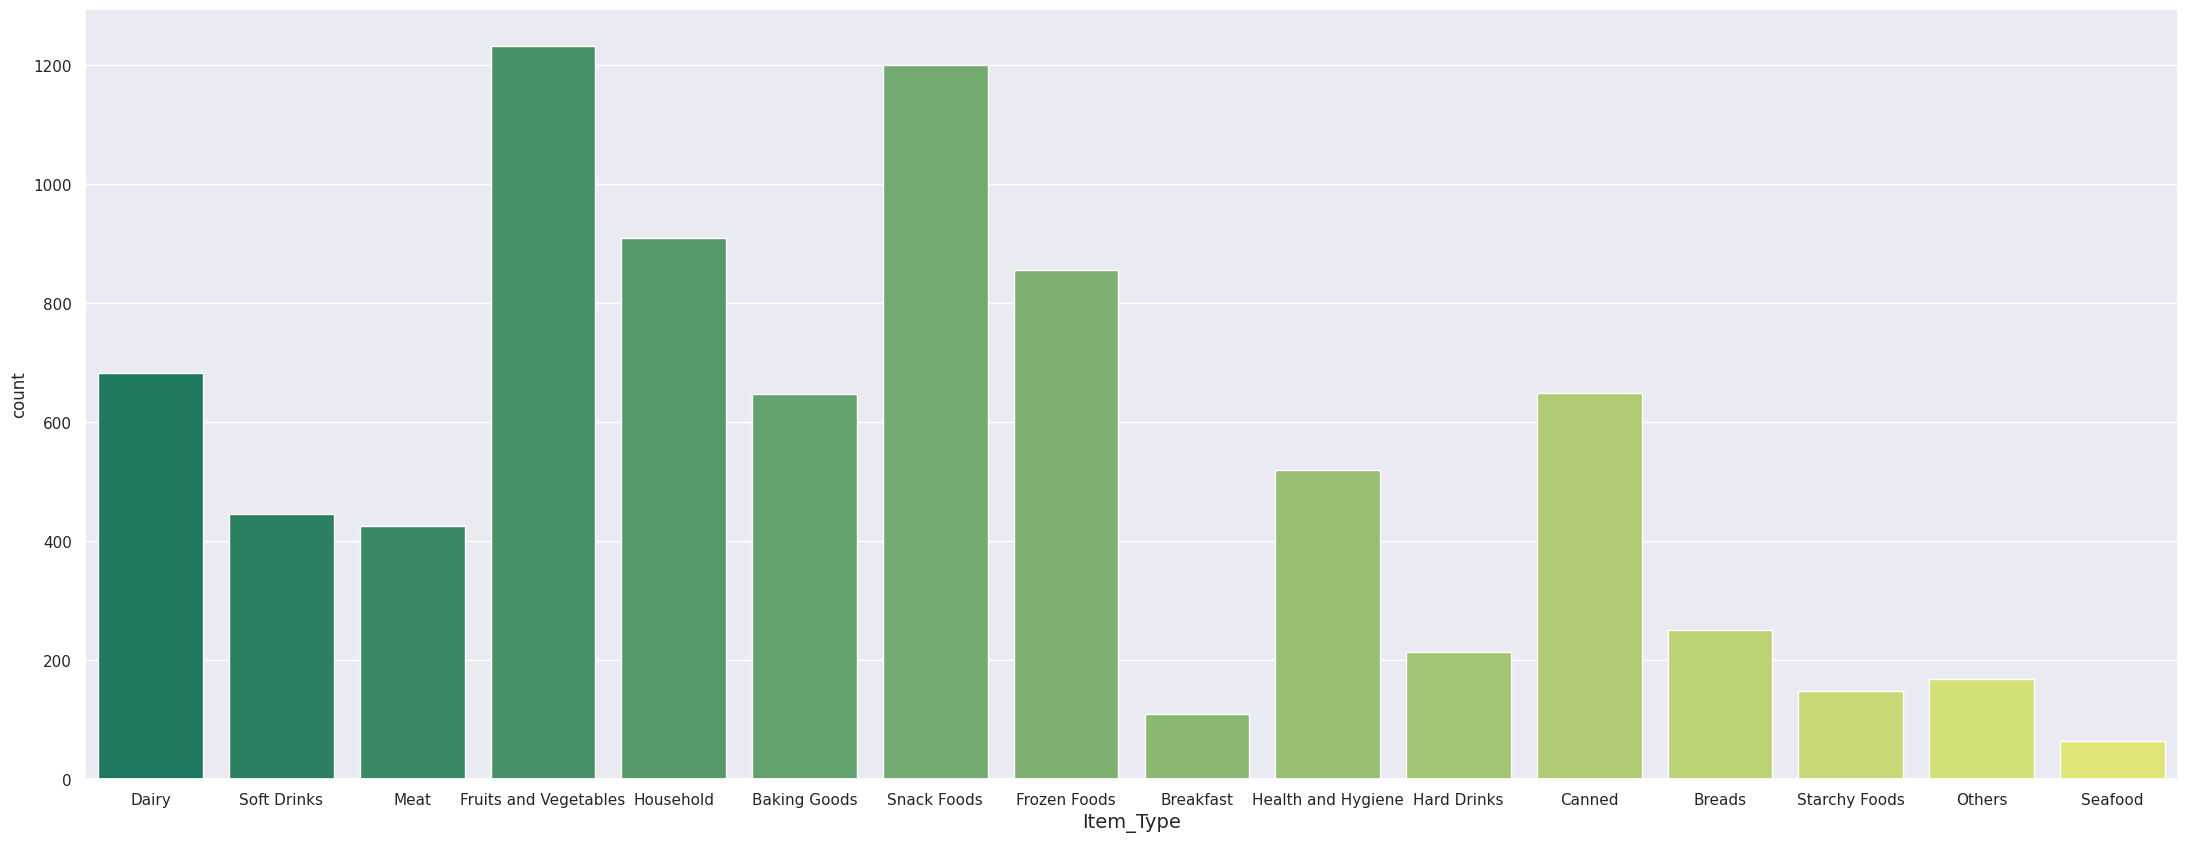

In [ ]:
plt.figure(figsize=(27,10))
sns.countplot(x='Item_Type' , data=df ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

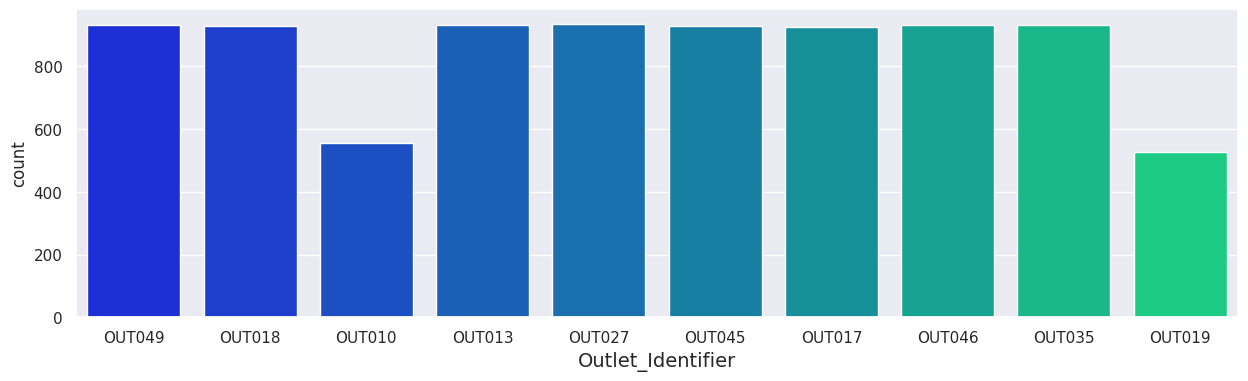

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=df ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

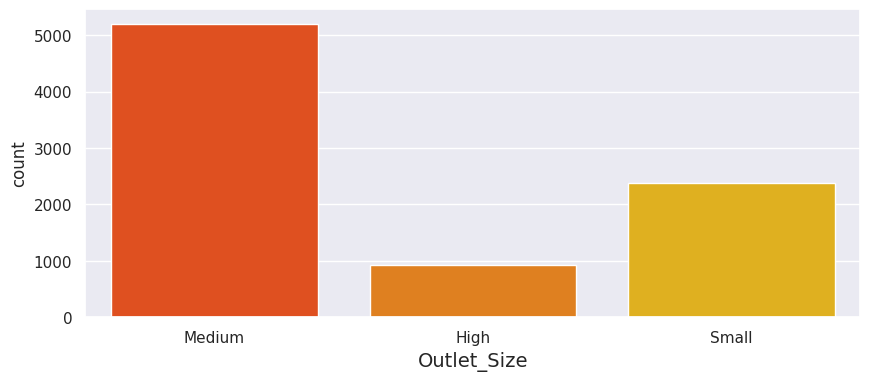

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=df ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

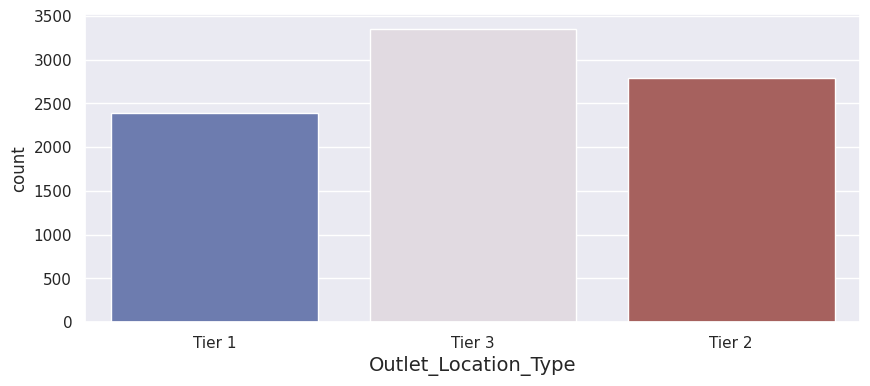

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=df ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

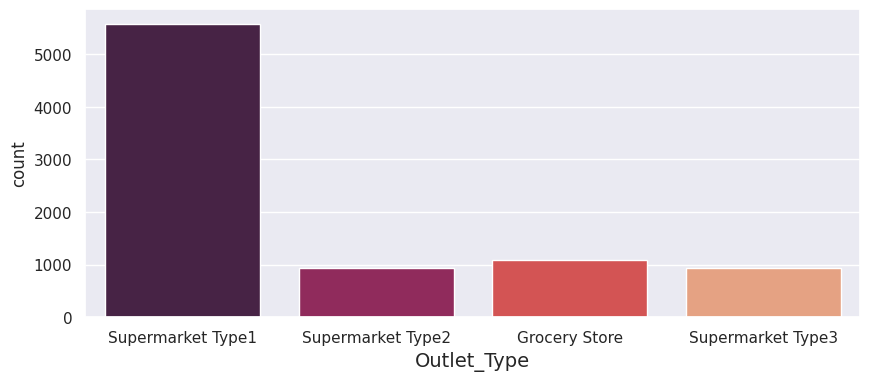

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=df ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

*italicised text*#### Categoric columns realizations

* `Item_Fat_Content` - Most items sold are low fat.
* `Item_Type` - Item types that are distictly popular are `fruits and vegetables` and `snack foods`. 
* `Outlet_Identifier` - Sold items are ditributed evenly among outlets excluding `OUT010` and `OUT019` that are significanly lower. 
* `Outlet_Size` - Bigmart outlets are mostly medium sized in our data. 
* `Outlet_Location_Type` - The most common type is `Tier3`.
* `Outlet_Type` - By a wide margin the mode outlet type is `Supermarket Type1`.

Now for the numerical columns:

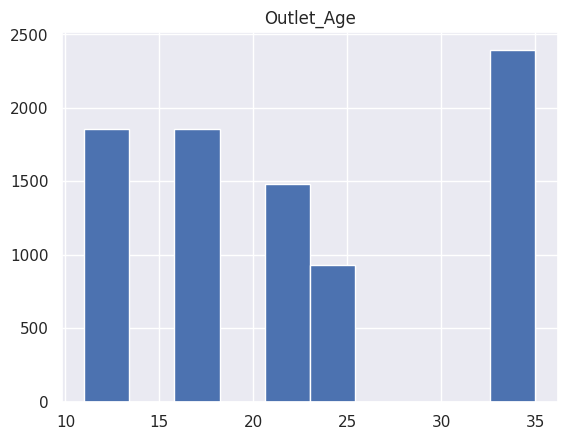

In [ ]:
#list of all the numeric columns
num = df.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  df[num]

plt.hist(df['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

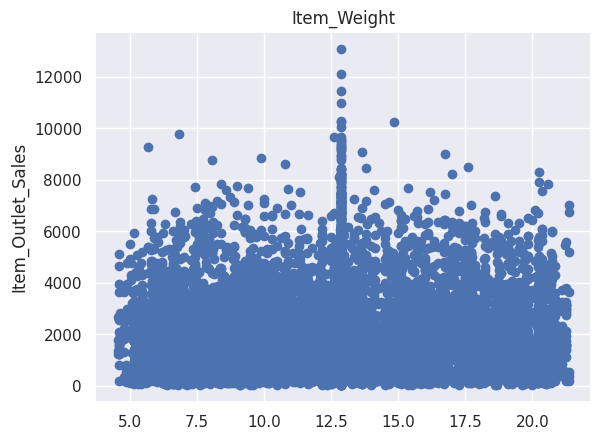

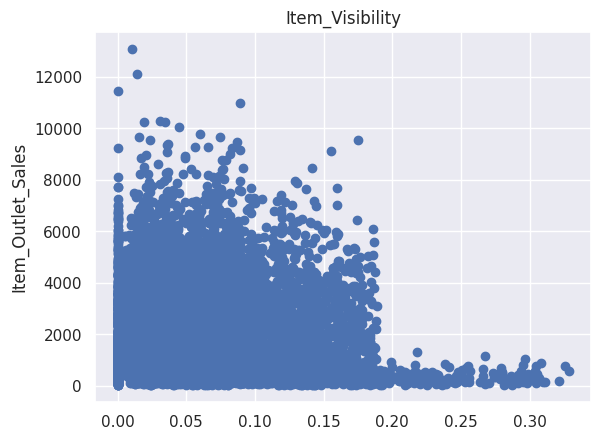

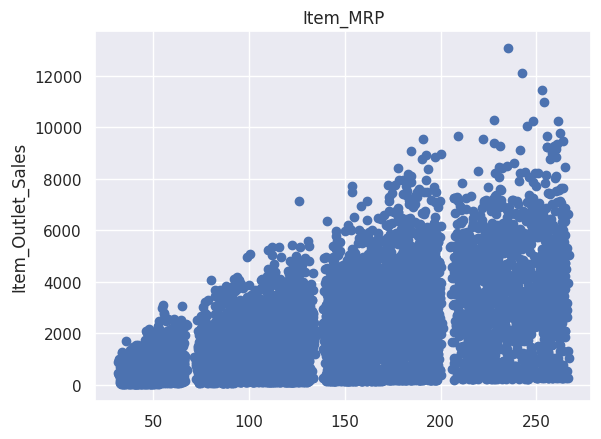

In [ ]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

### multivariate plots
I want to check the following relationships with `Item_Outlet_Sales`:
* Sales per item type
* Sales per outlet
* Sales per outlet type
* Sales per outlet size
* Sales per location type

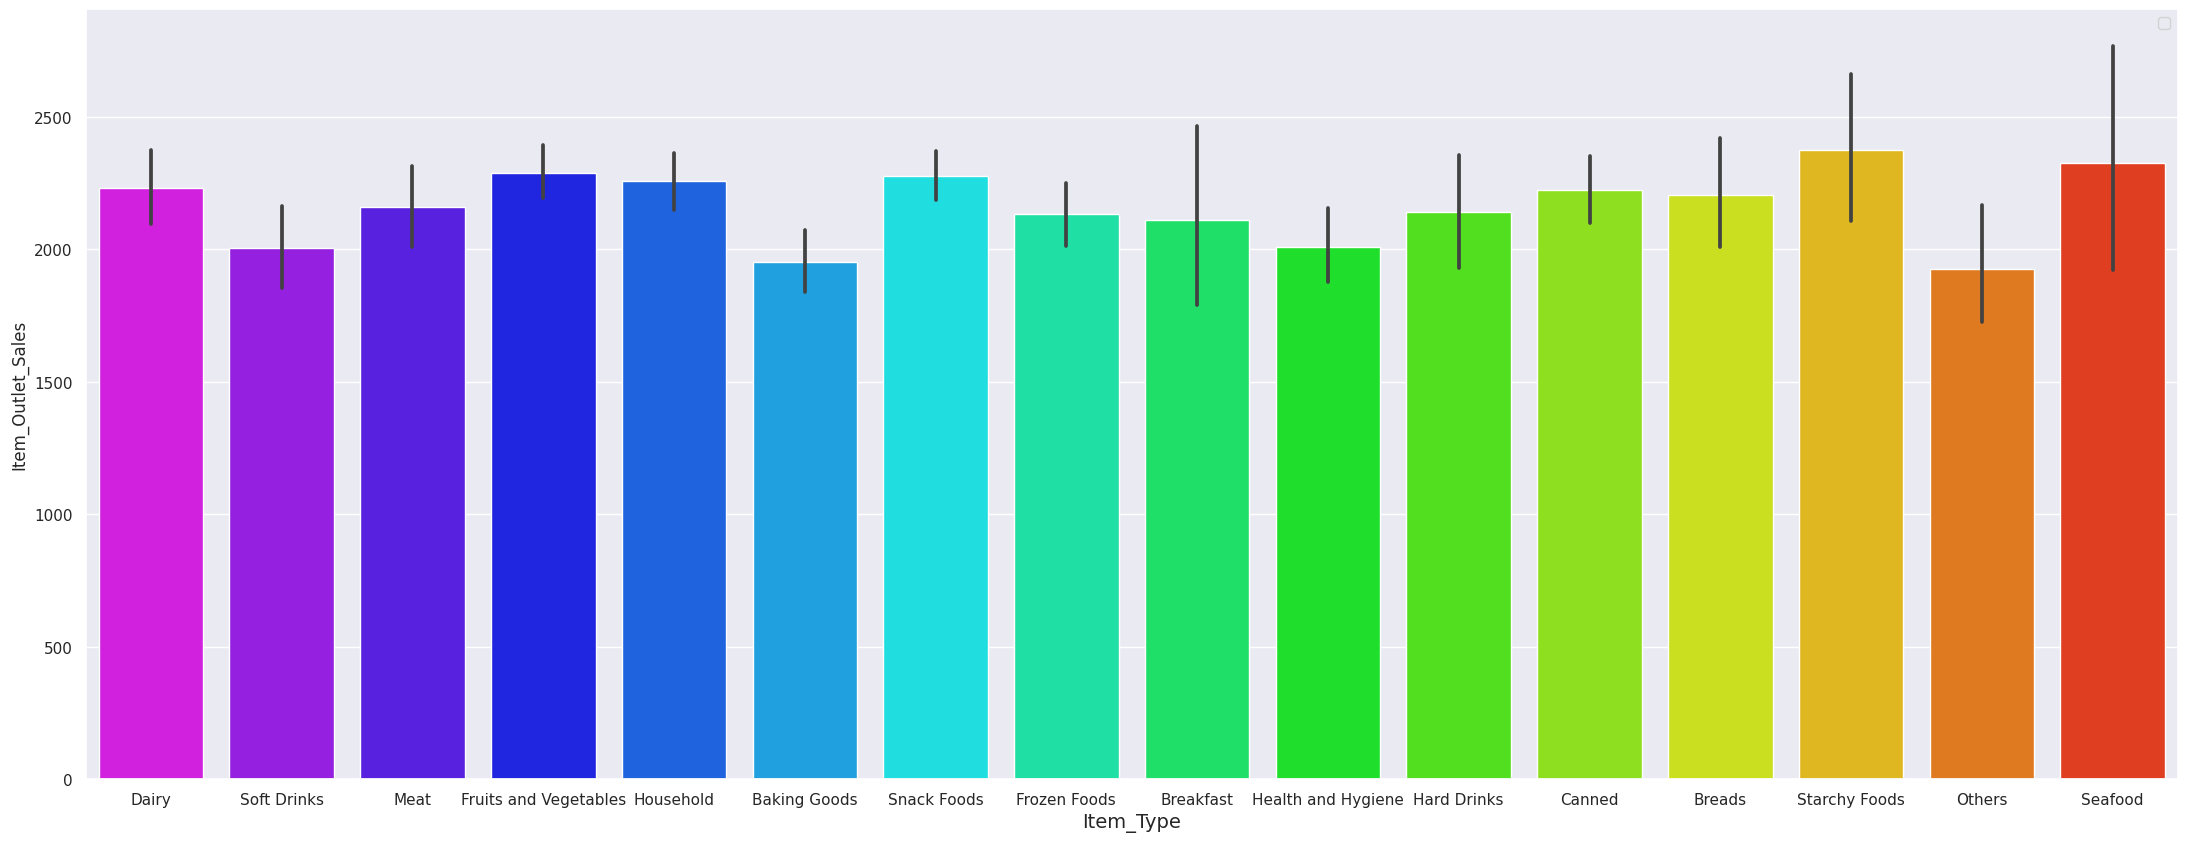

In [ ]:
plt.figure(figsize=(27, 10))
sns.barplot(x=df['Item_Type'], y=df['Item_Outlet_Sales'], palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

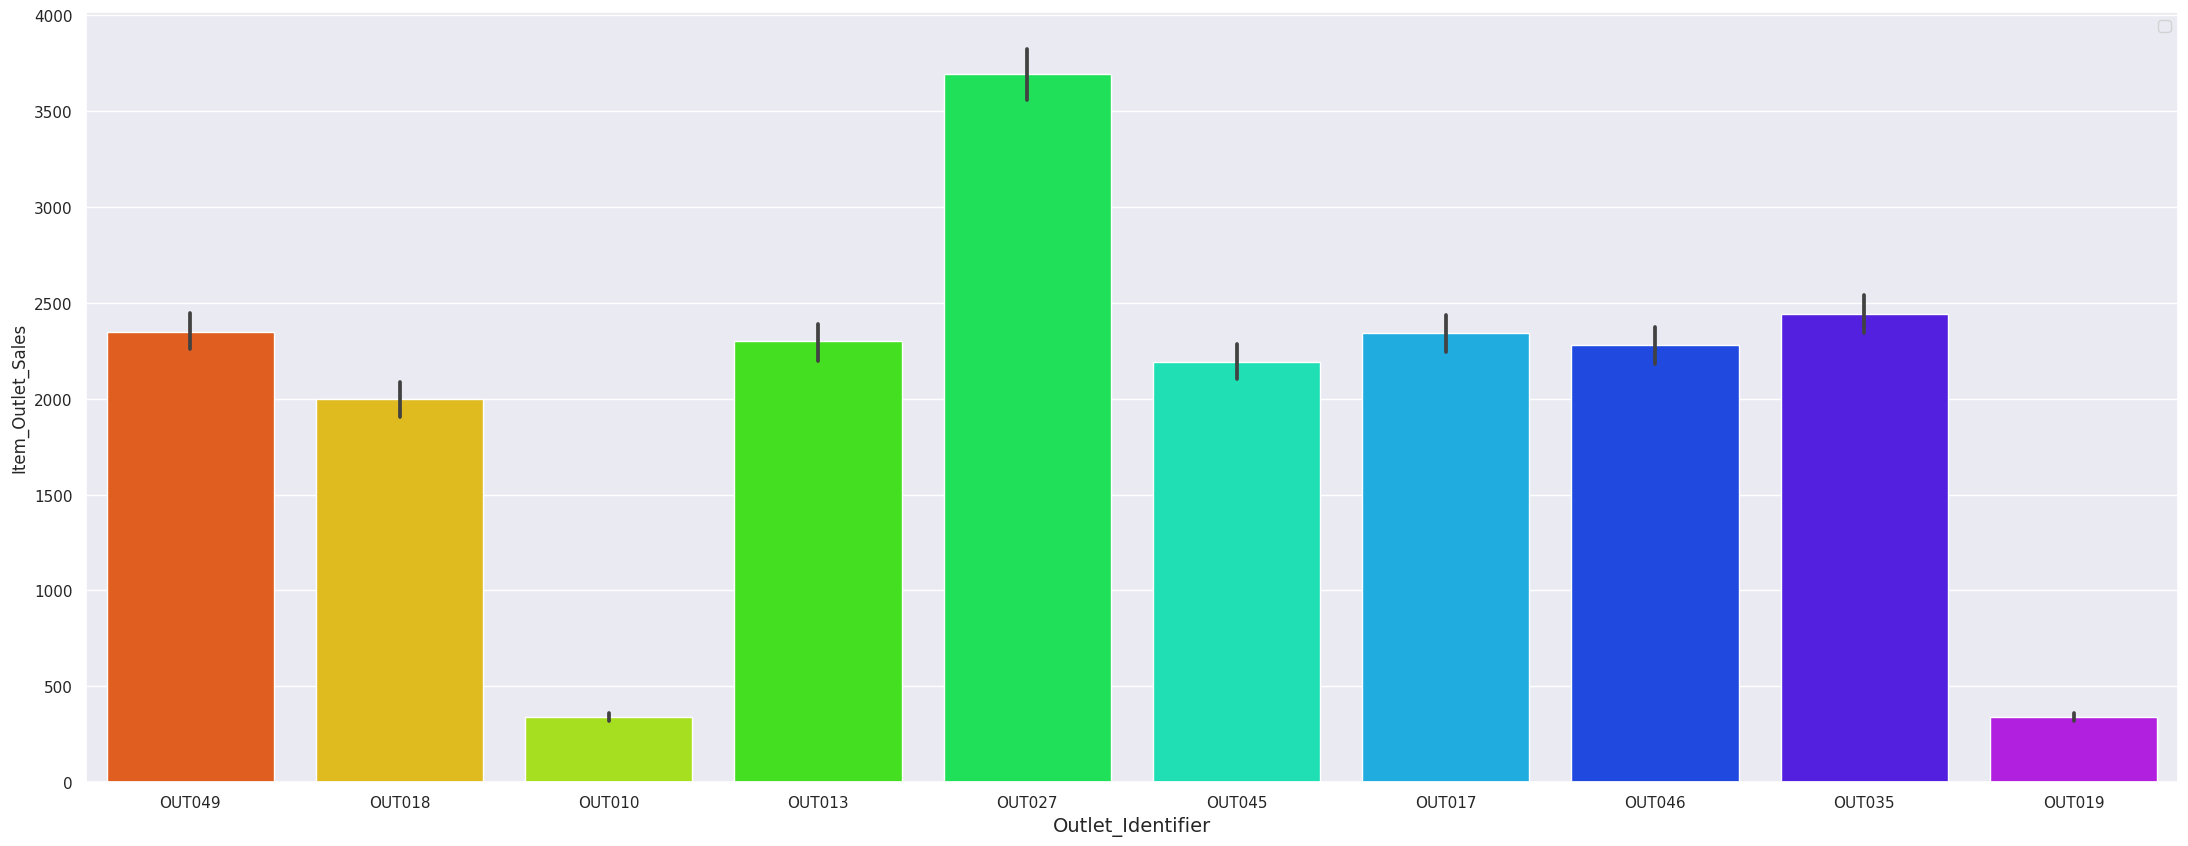

In [ ]:
plt.figure(figsize=(27, 10))
sns.barplot(x=df['Outlet_Identifier'], y=df['Item_Outlet_Sales'], palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()


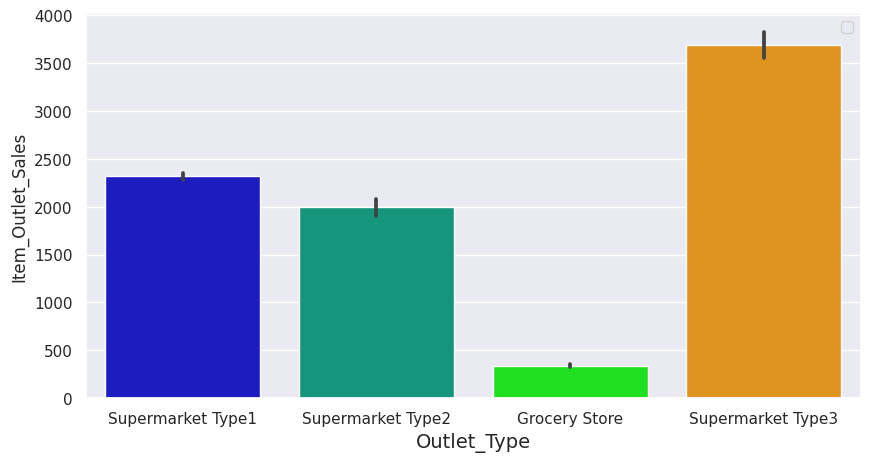

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Outlet_Type'], y=df['Item_Outlet_Sales'], palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()


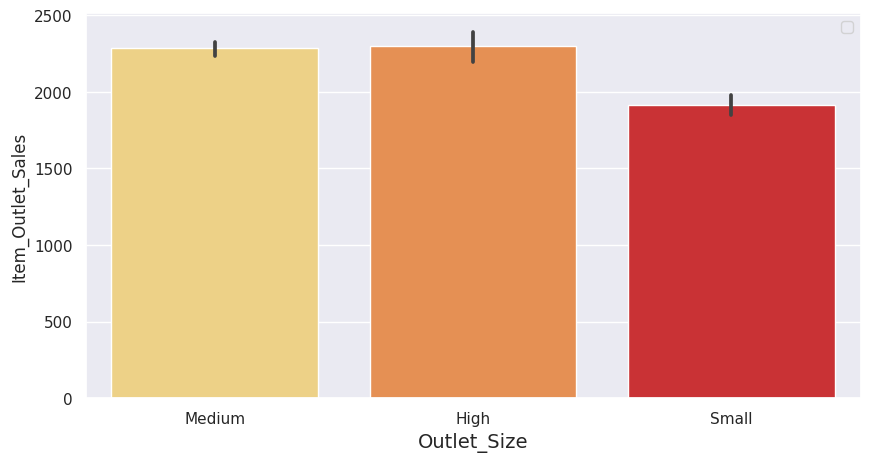

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df['Outlet_Size'], y=df['Item_Outlet_Sales'], palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()


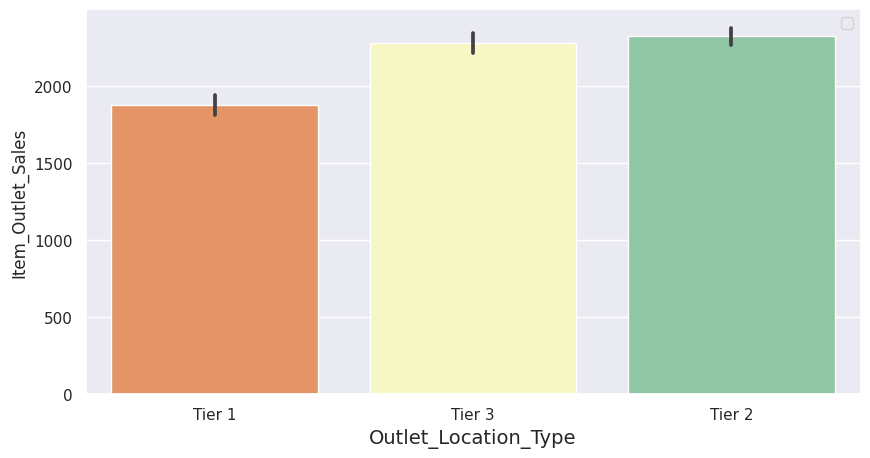

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()


#### Realizations:

* The difference in item types by sales is very small.
* Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.
* Suprisingly supermarket type 3 is the most profitable and not type 1.
* Medium and high outlet sizes are pretty much even in sales.
* Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger). 

# **Corraltion Matrix**

<Axes: >

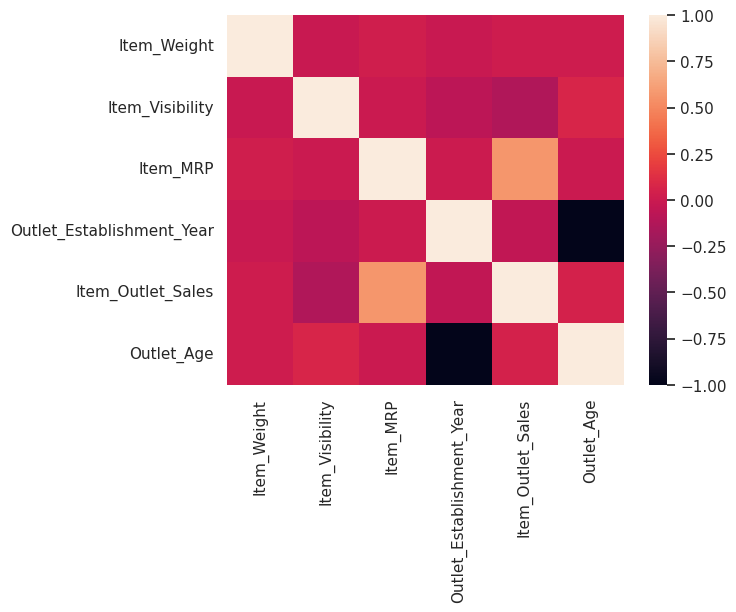

In [ ]:
#plotting the correlation matrix
sns.heatmap(df.corr() ,cmap='rocket')

### Feature Engineering

**Categorical values**:

We have 7 columns we need to delete or encode.

* Ordinal variables:
    * `Item_Fat_Content`  
    * `Outlet_Size`  
    * `Outlet_Location_Type`
    
* Nominal variables:
    * `Item_Identifier `  
    * `Item_Type`
    * `Outlet_Identifier`
    * `Outlet_Type`

**Numeric values**:

* From the numeric variables `Outlet_Establishment_Year` is no longer needed

**Conclusion:**

In my FE process i have decided:

1. The columns `Outlet_Establishment_Year`, `Item_Identifier ` and `Outlet_Identifier` don't have significant values so we will drop them.
2. All Ordinal variables will be Label encoded.
3. The columns `Outlet_Type` and `Item_Type`  will be One Hot encoded.



In [ ]:
BM_cat.apply(lambda x: x.nunique()) #checking the number of unique values in each column

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [ ]:
#lable encoding

le = LabelEncoder()
Label = ['Item_Fat_Content','Outlet_Size','Outlet_Location_Type']

for i in Label:
    df[i] = le.fit_transform(df[i])
    df[i] = le.fit_transform(df[i])
    
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


In [ ]:
cols = ['Item_Type', 'Outlet_Type']

# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
tr_oh = pd.DataFrame(OH_encoder.fit_transform(df[cols])).astype('int64')
te_oh = pd.DataFrame(OH_encoder.transform(df_test[cols])).astype('int64')

# Get feature columns
tr_oh_columns = OH_encoder.get_feature_names_out(cols)
te_oh_columns = OH_encoder.get_feature_names_out(cols)

# Assign feature column names
tr_oh.columns = tr_oh_columns
te_oh.columns = te_oh_columns

# One-hot encoding removed index; put it back
tr_oh.index = df.index
te_oh.index = df_test.index

# Add one-hot encoded columns to the main dataframe
tr_fe = pd.concat([df, tr_oh], axis=1)
te_fe = pd.concat([df_test, te_oh], axis=1)

In [ ]:
# Dropping irrelevant columns

tr_fe  = tr_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [ ]:
tr_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0


# Machine learning models



First of all we will divide our dataset into two variables `X` as the features we defined earlier and `y` as the `	Item_Outlet_Sales` the target value we want to predict.

**Assumptions:**

* This is a regression problem so we will use Regression methods.

* Train test split will be a 8:2 ratio respectively.

## Models we will use:

* **Linear Regression** 
* **Random Forest Regressor** 
* **Lasso Regressor** 

In [ ]:
y = tr_fe['Item_Outlet_Sales']
X = tr_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)


# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) value
r2 = r2_score(y_test, y_pred)

# Print MSE and R2 values
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) value:", r2)

Mean Squared Error (MSE): 1285793.5422420811
R-squared (R2) value: 0.5592800095247036


# **Regularized Linear Regression**

In [1]:

# Create Ridge regression object
ridge_reg = Ridge(alpha=0.5)  # You can adjust the regularization strength by changing the alpha value

# Fit the model to the training data
ridge_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_reg.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) value
r2 = r2_score(y_test, y_pred)

# Print MSE and R2 values
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) value:", r2)

NameError: ignored

# **RandomForest**

In [ ]:

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor()

# Fit the model on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2) value
r2 = r2_score(y_test, y_pred)

# Print MSE and R2 values
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) value:", r2)

Mean Squared Error: 1675262.4776636069
R-squared Score: 0.38363468448755145


# **XGBoost**

In [3]:
model = xgb.XGBRegressor()

model.fit(X_train, y_train)


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2) value:", r2)


NameError: ignored

# **Models Outputs:**

Linear Regression: 

    Mean Squared Error: 1760774.2713216154
    R-squared Score: 0.3521730452633741

Regularized Linear Regression:

    Ridge Regression:
    Mean Squared Error: 1760774.2713216154
    R-squared Score: 0.3521730452633741

Random Forest:

    Mean Squared Error: 1675262.4776636069
    R-squared Score: 0.38363468448755145

XG BOOST:

    Mean Squared Error: 1985.0462059910365
    R-squared Score: 0.9992696585476153